In [4]:
#import necessary packages
import tensorflow
import keras
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn import linear_model

import matplotlib.pyplot as plt


In [5]:
#import animal feature and label data
filepath = "C:\\Users\\nkeen\\Documents\\Springboard\\Capstone2\\petfinder-adoption-prediction\\train\\train.csv"
df = pd.read_csv(filepath)

#import image metadata to merge with animal features and label data
#data is already one hot encoded
filepath2 = "C:\\Users\\nkeen\\Documents\\Springboard\\Capstone2\\petfinder-adoption-prediction\\train\\image_labels.csv"

image_labels = pd.read_csv(filepath2)

merged_df = pd.merge(df, image_labels, left_on=df.PetID, right_on=image_labels.PetID, how='left', sort=False)

#merged_df = merged_df.fillna(values)
#replace missing values with 0
merged_df = merged_df.fillna(0)

#assign columns to variables for model
y = merged_df['AdoptionSpeed'].values
X = merged_df.drop(['AdoptionSpeed', 'Description', 'Name', 'RescuerID', 'key_0', 'PetID_x', 'PetID_y'], axis=1)



In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 81 columns):
Type            14993 non-null int64
Age             14993 non-null int64
Breed1          14993 non-null int64
Breed2          14993 non-null int64
Gender          14993 non-null int64
Color1          14993 non-null int64
Color2          14993 non-null int64
Color3          14993 non-null int64
MaturitySize    14993 non-null int64
FurLength       14993 non-null int64
Vaccinated      14993 non-null int64
Dewormed        14993 non-null int64
Sterilized      14993 non-null int64
Health          14993 non-null int64
Quantity        14993 non-null int64
Fee             14993 non-null int64
State           14993 non-null int64
VideoAmt        14993 non-null int64
PhotoAmt        14993 non-null float64
animal          14993 non-null float64
aqua            14993 non-null float64
austrian        14993 non-null float64
basset          14993 non-null float64
beagle          14993 non-null

In [7]:
#convert remaining categorical columns to dummy values (1,0)
#removed MaturitySize and FurLength from columns_to_shift because they have ordinality (fur length is short to long,
#maturity size is small to large)
columns_to_shift = ['Type','State','Breed1','Breed2','Gender','Color1','Color2', 'Color3', 
                    'Vaccinated', 'Dewormed', 'Sterilized']

df_shifted = pd.get_dummies(X, columns=columns_to_shift).values

n_cols = df_shifted.shape[1]

In [8]:
pd.DataFrame(df_shifted).head()

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,3.0,1.0,1.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,2.0,2.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,2.0,1.0,1.0,1.0,150.0,0.0,8.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
model = Sequential()
#Try running with only 1 later in input layer
model.add(Dense(475, activation='relu', input_shape=(n_cols,)))
#may not need second Dense Layer
model.add(Dense(125, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

In [12]:
model.fit(df_shifted, y, epochs=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
14993/14993 [==============================] - 7s 449us/step - loss: 1.6782 - acc: 0.2633
Epoch 2/150
14993/14993 [==============================] - 2s 115us/step - loss: 1.2497 - acc: 0.2839
Epoch 3/150
14993/14993 [==============================] - 2s 116us/step - loss: 1.2067 - acc: 0.2915
Epoch 4/150
14993/14993 [==============================] - 2s 116us/step - loss: 1.1678 - acc: 0.2953
Epoch 5/150
14993/14993 [==============================] - 2s 116us/step - loss: 1.1618 - acc: 0.3021 0s - loss: 1.1568 - acc: 0.3
Epoch 6/150
14993/14993 [==============================] - 2s 117us/step - loss: 1.1138 - acc: 0.3080
Epoch 7/150
14993/14993 [==============================] - 2s 120us/step - loss: 1.1082 - acc: 0.3167
Epoch 8/150
14993/14993 [==============================] - 2s 117us/step - loss: 1.0612 - acc: 0.3271
Epoch 9/150
14993/14993 [==============================] - 2s 116us/step - loss: 1.0360 - acc: 0.3358
Epoch

14993/14993 [==============================] - 2s 115us/step - loss: 0.2059 - acc: 0.8215
Epoch 77/150
14993/14993 [==============================] - 2s 114us/step - loss: 0.2093 - acc: 0.8226
Epoch 78/150
14993/14993 [==============================] - 2s 114us/step - loss: 0.1996 - acc: 0.8264
Epoch 79/150
14993/14993 [==============================] - 2s 116us/step - loss: 0.1992 - acc: 0.8265
Epoch 80/150
14993/14993 [==============================] - 2s 113us/step - loss: 0.1937 - acc: 0.8321
Epoch 81/150
14993/14993 [==============================] - 2s 111us/step - loss: 0.1900 - acc: 0.8374
Epoch 82/150
14993/14993 [==============================] - 2s 112us/step - loss: 0.1977 - acc: 0.8331
Epoch 83/150
14993/14993 [==============================] - 2s 111us/step - loss: 0.1910 - acc: 0.8354
Epoch 84/150
14993/14993 [==============================] - 2s 112us/step - loss: 0.1927 - acc: 0.8349
Epoch 85/150
14993/14993 [==============================] - 2s 117us/step - loss: 0.18

In [13]:
ypredictions = model.predict(df_shifted)

In [14]:
# evaluate the model
scores = model.evaluate(df_shifted, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

14993/14993 [==============================] - 1s 36us/step

acc: 90.59%


In [15]:
df_y = pd.DataFrame(y)

df_y['ypredictions'] = ypredictions

In [16]:
print('Mean Squared Error', mean_squared_error(y, ypredictions))    
df_y.head()

Mean Squared Error 0.12007889544976878


,0,ypredictions
0,2,2.279197
1,0,0.058015
2,3,3.076245
3,2,2.624859
4,2,1.765039


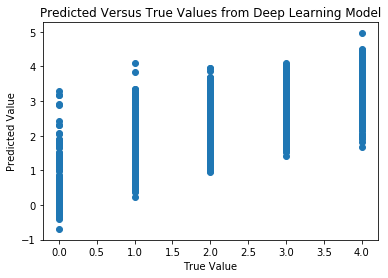

In [26]:
#Predicted versus tru values from deep learning model
_ = plt.scatter(df_y[0], df_y['ypredictions'])
_ = plt.xlabel("True Value")
_ = plt.ylabel("Predicted Value")
_ = plt.title("Predicted Versus True Values from Deep Learning Model")
plt.show()

In [20]:
#linear regression model on the df_shifted dataset and y label to compare accuracy.

#Train/Test Split

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size = 0.30)

# Train and Test dataset size details
print("Train_x Shape :: ", train_x.shape)
print("Train_y Shape :: ", train_y.shape)
print("Test_x Shape :: ", test_x.shape)
print("Test_y Shape :: ", test_y.shape)

Train_x Shape ::  (10495, 81)
Train_y Shape ::  (10495,)
Test_x Shape ::  (4498, 81)
Test_y Shape ::  (4498,)


In [21]:
#Build and train and test linear regression model
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

linear_predictions = regr.predict(test_x)

In [22]:
#Assign predictions to a dataframe for review and graphing
pred_df = pd.DataFrame(linear_predictions)
df_test_y = pd.DataFrame(test_y)

pred_df['test_value'] = df_test_y

print('Mean Squared Error', mean_squared_error(test_y, linear_predictions))    
pred_df.head()

Mean Squared Error 1.2776617655772737


,0,test_value
0,2.064551,4
1,2.358905,4
2,2.387255,2
3,2.824406,4
4,1.764920,4


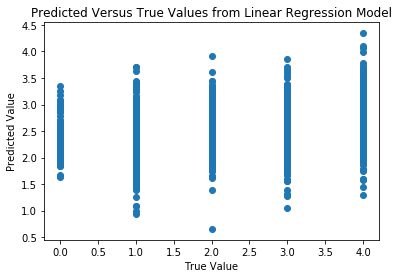

In [27]:
#Plot predictions versus true values for linear regression model
_ = plt.scatter(pred_df['test_value'],pred_df[0])
_ = plt.xlabel("True Value")
_ = plt.ylabel("Predicted Value")
_ = plt.title("Predicted Versus True Values from Linear Regression Model")
plt.show()